**Implemeting ANN digit recognizer from scratch**

We will be using the popular MNSIT dataset here. 

Link: https://www.kaggle.com/sylvia23/mnist-data-for-digit-recognation

In [72]:
#importing necessary packages
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

In [147]:
#Importing training dataset
X_train = idx2numpy.convert_from_file('C:/Users/Vishal/Downloads/7666_10873_bundle_archive/train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('C:/Users/Vishal/Downloads/7666_10873_bundle_archive/train-labels.idx1-ubyte')

#Dimensions
print("X-train :", X_train.shape, "Y-train: ",y_train.shape)

X-train : (60000, 28, 28) Y-train:  (60000,)


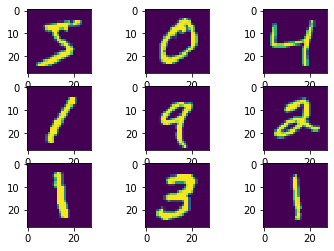

In [148]:
#Displaying few images
#Each image is 28 * 28 pixel image
plt.figure(figsize=(6,4))

for i in range(9):
  plt.subplot(3,3,i + 1)
  plt.imshow(X_train[i])

plt.show()

In [149]:
#Reshaping
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = y_train.reshape(len(y_train), 1).T
print("X-train :", X_train.shape, "Y-train: ",y_train.shape)

X-train : (60000, 784) Y-train:  (1, 60000)


In [150]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print(X_train.shape)

(60000, 784)


In [139]:
#Transposing matrix X
X_train = X_train.reshape(X_train.shape[0], -1).T

The output layer will be 10 units. The unit with the highest value is our predicted digit. 

Now we need to reshape y accordingly

In [67]:
#Reshaping Y_train
Y_train = np.zeros((10,y_train.shape[1]))
for i in range(y_train.shape[1]):
    Y_train[y_train[0,i],i]=1 #The respective position in the column is marked 1

print(Y_train.shape)    

(10, 60000)


Alright now lets build our neural network

In [15]:
def sigmoid(X):
  res = 1 / (1 + np.exp(-X))
  return res

In [16]:
def initialize_parameters(input_layer, hidden_layer_1, hidden_layer_2, hidden_layer_3, output_layer):
  
  #Weights and biases between input layer and hidden layer 1 
  W1 = np.random.randn(hidden_layer_1, input_layer) * 0.01
  b1 = np.zeros((hidden_layer_1, 1))

  #Weights and biases between hidden layer 1 and hidden layer 2 
  W2 = np.random.randn(hidden_layer_2, hidden_layer_1) * 0.01
  b2 = np.zeros((hidden_layer_2, 1))
  
  #Weights and biases between hidden layer 1 and hidden layer 2 
  W3 = np.random.randn(hidden_layer_3, hidden_layer_2) * 0.01
  b3 = np.zeros((hidden_layer_3, 1))

  #Weights and biases between hidden layer 3 and output layer 
  W4 = np.random.randn(output_layer, hidden_layer_3) * 0.01
  b4 = np.zeros((output_layer, 1))

  Weights = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2, "W3" : W3, "b3" : b3, "W4" : W4, "b4" : b4}
  return Weights

In [17]:
def Forward_prop(X, Weights):

  #Extracting weights and biases
  W1 = Weights["W1"]
  W2 = Weights["W2"]
  W3 = Weights["W3"]
  W4 = Weights["W4"]

  b1 = Weights["b1"]
  b2 = Weights["b2"]
  b3 = Weights["b3"]
  b4 = Weights["b4"]

  #Forward propagation - We will be using tanh as activation for hidden layer 
  #and sigmoid for output_layer
  Z1 = np.matmul(W1, X) + b1
  A1 = np.tanh(Z1)

  Z2 = np.matmul(W2, A1) + b2
  A2 = np.tanh(Z2)

  Z3 = np.matmul(W3, A2) + b3
  A3 = np.tanh(Z3)
  
  Z4 = np.matmul(W4, A3) + b4
  A4 = sigmoid(Z4) #Our Y_hat or predicted value

  Units = {"Z1" : Z1, "A1" : A1, "Z2" : Z2, "A2" : A2, "Z3" : Z3, "A3" : A3, "Z4" : Z4, "A4" : A4}
  return Units

In [18]:
def cost_compute(Units, y, m):

  #Extracting Y_hat from Units
  A4 = Units["A4"]

  #The cost function is the same as the one we used for logistic regression
  J = (np.sum((-y * np.log(A4)) - ((1 - y) * (np.log(1 - A4)))) / m)

  return J

In [19]:
def Back_prop(Weights, Units, X, Y):

  #Extracting Weights
  W1 = Weights["W1"]
  W2 = Weights["W2"]
  W3 = Weights["W3"]
  W4 = Weights["W4"]

  #Extracting units
  A1 = Units["A1"]
  A2 = Units["A2"]
  A3 = Units["A3"]
  A4 = Units["A4"]

  #Back propagation
  dz4 = A4 - Y
  dw4 = (1/m) * np.matmul(dz4, A3.T)
  db4 = (1/m) * np.sum(dz4, axis = 1, keepdims = True)

  dz3 = np.multiply(np.matmul(W4.T, dz4), 1 - np.power(A3,2)) # derivative of tanh(Z) = 1-A^2
  dw3 = (1/m) * np.matmul(dz3, A2.T)
  db3 = (1/m) * np.sum(dz3, axis = 1, keepdims = True)
  
  dz2 = np.multiply(np.matmul(W3.T, dz3), 1 - np.power(A2,2))
  dw2 = (1/m) * np.matmul(dz2, A1.T)
  db2 = (1/m) * np.sum(dz2, axis = 1, keepdims = True)

  dz1 = np.multiply(np.matmul(W2.T, dz2), 1 - np.power(A1,2))
  dw1 = (1/m) * np.matmul(dz1, X.T)
  db1 = (1/m) * np.sum(dz1, axis = 1, keepdims = True)

  Grads = {"dw1" : dw1, "db1" : db1, "dw2" : dw2, "db2" : db2, "dw3" : dw3, "db3" : db3, "dw4" : dw4, "db4" : db4}
  return Grads

In [20]:
def Update_Weights(Weights, Grads, alpha):
  
  #Extracting weights and biases
  W1 = Weights["W1"]
  W2 = Weights["W2"]
  W3 = Weights["W3"]
  W4 = Weights["W4"]

  b1 = Weights["b1"]
  b2 = Weights["b2"]
  b3 = Weights["b3"]
  b4 = Weights["b4"]

  #Extracting grads
  dw1 = Grads["dw1"]
  dw2 = Grads["dw2"]
  dw3 = Grads["dw3"]
  dw4 = Grads["dw4"]

  db1 = Grads["db1"]
  db2 = Grads["db2"]
  db3 = Grads["db3"]
  db4 = Grads["db4"]

  #Updating weights and biases
  W1 = W1 - alpha * dw1
  W2 = W2 - alpha * dw2
  W3 = W3 - alpha * dw3
  W4 = W4 - alpha * dw4

  b1 = b1 - alpha * db1
  b2 = b2 - alpha * db2
  b3 = b3 - alpha * db3
  b4 = b4 - alpha * db4

  Weights = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2, "W3" : W3, "b3" : b3, "W4" : W4, "b4" : b4}
  return Weights

Cost after Iter : 0 Cost : 6.931449978461073
Cost after Iter : 2500 Cost : 3.2492827825233954
Cost after Iter : 5000 Cost : 3.248359769122685
Cost after Iter : 7500 Cost : 3.082672893602663
Cost after Iter : 10000 Cost : 2.5186872971924243
Cost after Iter : 12500 Cost : 1.8540482075359979
Cost after Iter : 15000 Cost : 1.134509519984566
Cost after Iter : 17500 Cost : 0.6088605885387313
Cost after Iter : 20000 Cost : 0.39371913672226005
Cost after Iter : 22500 Cost : 0.2863102972874991
Cost after Iter : 25000 Cost : 0.2199537526097359
Cost after Iter : 27500 Cost : 0.17596419897510268
Cost after Iter : 30000 Cost : 0.1448292777032391
Cost after Iter : 32500 Cost : 0.12207828758182901
Cost after Iter : 35000 Cost : 0.10522672769662604
Cost after Iter : 37500 Cost : 0.09214973063242202
Cost after Iter : 40000 Cost : 0.08166006832496166
Cost after Iter : 42500 Cost : 0.07323848999645997
Cost after Iter : 45000 Cost : 0.06607847149983695
Cost after Iter : 47500 Cost : 0.06028018901766153


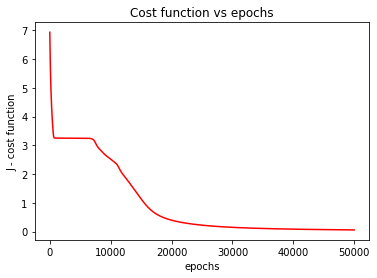

In [24]:
# ANN implementation
input_layer = X_train.shape[0]
hidden_layer_1 = 60
hidden_layer_2 = 20
hidden_layer_3 = 20
output_layer = Y_train.shape[0]

epochs = 50000
m = X_train.shape[1]
alpha = 0.01

#Dictionary containing the weights of the different layers
Weights = initialize_parameters(input_layer, hidden_layer_1, hidden_layer_2, hidden_layer_3, output_layer)

#Storing cost history for plotting purposes
J_hist = []

#Gradient descent
for i in range(epochs):
  Units = Forward_prop(X_train, Weights)

  J = cost_compute(Units, Y_train, m)
  J_hist.append(J)

  Grads = Back_prop(Weights, Units, X_train, Y_train)  

  Weights = Update_Weights(Weights, Grads, alpha)
  if i % 2500 == 0:
    print("Cost after Iter :", i, "Cost :", J)

#Plotting cost vs epochs
plt.plot(list(range(epochs)), J_hist, color = 'red')
plt.title("Cost function vs epochs")
plt.xlabel("epochs")
plt.ylabel("J - cost function")
plt.show()

Alright now lets prepare our test set

In [151]:
#Importing training dataset
X_test = idx2numpy.convert_from_file('C:/Users/Vishal/Downloads/7666_10873_bundle_archive/t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('C:/Users/Vishal/Downloads/7666_10873_bundle_archive/t10k-labels.idx1-ubyte')

#Reshaping
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = y_test.reshape(len(y_test), 1).T

#Feature scaling
X_test = scaler.transform(X_test)

print("X-test :", X_test.shape, "Y-test: ",y_test.shape)

X-test : (10000, 784) Y-test:  (1, 10000)


In [152]:
#Transposing matrix X_test
X_test = X_test.reshape(X_test.shape[0], -1).T
print("X-test :", X_test.shape)

X-test : (784, 10000)


In [158]:
#Reshaping Y_test
Y_test = np.zeros((10,y_test.shape[1]))
for i in range(y_test.shape[1]):
    Y_test[y_test[0,i],i]=1 #The respective position in the column is marked 1

print(Y_test.shape) 

(10, 10000)


In [118]:
def predict(X, Weights):
    
  #Calling forward propagation and getting y_pred
  finalUnits = Forward_prop(X, Weights)
  y_pred = finalUnits["A4"]

  #Obtaining index (= digit) with highest value
  Y_pred = np.argmax(y_pred, axis = 0)
  Y_pred.reshape(1, Y_pred.shape[0])
    
  return Y_pred 

In [162]:
#Test set accuracy
#Lets get our predictions
y_pred = predict(X_test, Weights)
y_pred = y_pred.reshape(len(y_pred), 1).T

#Reshaping Y_pred
Y_pred = np.zeros((10,y_pred.shape[1]))
for i in range(y_pred.shape[1]):
    Y_pred[y_pred[0,i],i]=1 #The respective position in the column is marked 1
    
print(Y_pred.shape, Y_test.shape)

#Accuracy
score = (np.sum(Y_test == Y_pred) / 100000) * 100
print("Accuracy :", score, "%")

(10, 10000) (10, 10000)
Accuracy : 92.122 %


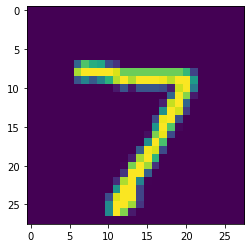

Predicted digit is : [7]
True digit is: [7]


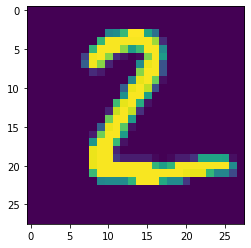

Predicted digit is : [2]
True digit is: [2]


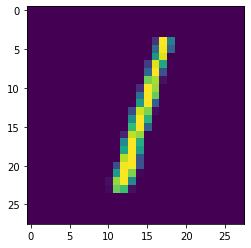

Predicted digit is : [1]
True digit is: [1]


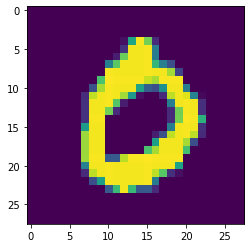

Predicted digit is : [0]
True digit is: [0]


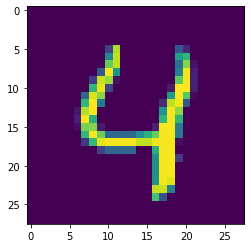

Predicted digit is : [4]
True digit is: [4]


In [134]:
#Showcasing some results
X_test = idx2numpy.convert_from_file('C:/Users/Vishal/Downloads/7666_10873_bundle_archive/t10k-images.idx3-ubyte')

for i in range(5):
    img = X_test[i].reshape((784,1)).T
    img = scaler.transform(img)
    img = img.T
    
    plt.imshow(X_test[i])
    plt.show()
    
    predicted_digit = predict(img, Weights)
    print('Predicted digit is : '+str(predicted_digit))
    print('True digit is: '+ str(np.where(Y_test[:,i] == 1)[0]))